In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# Objective 

Anomaly/Outlier detection is important in a business context in order to prevent fraud and improve security.

Usually, the problem is: 
* supervised
* semi-supervised
* unsupervised

with most of the problems being unsupervised. Our problem will be a supervised learning one.

# Background

We will be tackling credit card fraud. Credit cards were made for people to increase their purchase power. Money is borrowed and then agreed on to be paid back to the bank. Otherwise, an interest charge will incur. The cost of credit card fraud to the economy on a global level has been: $24 billion per year. Thus, automating its detection in order to start intervening on the issue is imperative for a business to be healthy. Building preditive/AI models helps in catching these fraudsters early on.    

# Analysis Structure:

1. Dataset Information
2. Data Visualization
3. Feature Selection
4. Data Balancing
5. Modeling
6. Conclusion

# Dataset Information

* V1 - V28 : Numerical features that are a result of PCA transformation.

* Time : Seconds elapsed between each transaction and the 1st transaction.

* Amount : Transaction amount.

* Class : Fraud or otherwise (1 or 0)

In [2]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
#check data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:>

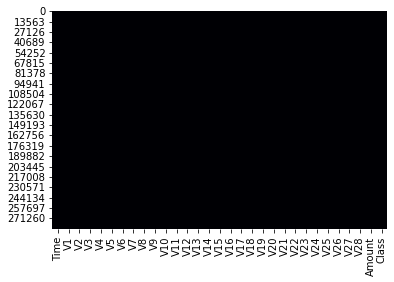

In [4]:
# check for NaN's
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

There are no NaN's.

In [5]:
# General stat's including quartiles per column
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


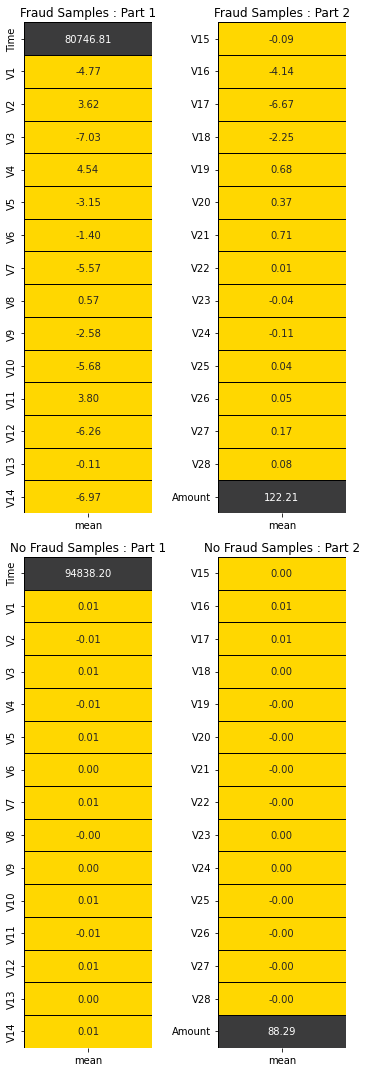

In [6]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

**These are the mean values for features for fraud and no fraud cases.**

Some observations:

* For No Fraud cases:
    ** V1 - V28 mean values are almost 0 for all cases
    ** Mean transaction amount of: 88.29 is less than the mean transaction amount for the fraudalent cases: 122.21
    ** Time taken for non-fraudalent transactions is more than that of fraudalent transactions

*These could be some of the indicators for detecting fraud transactions.*

# Data Visualization

Target Variable (Class) Visualization

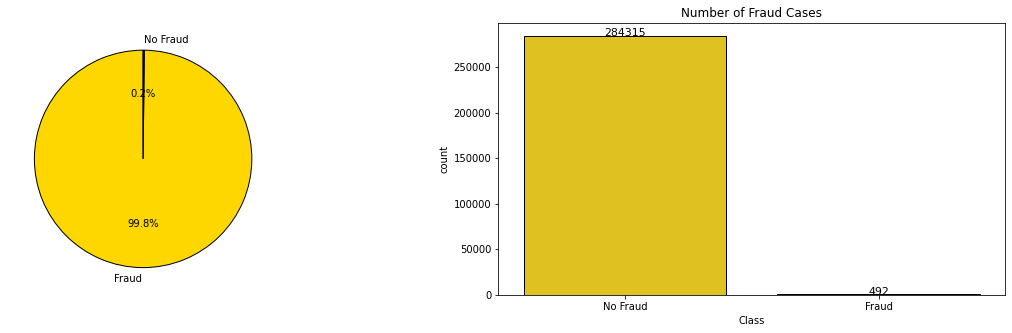

In [7]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

Notes:
    
* Highly imbalanced dataset with most cases being no fraud. 
* due to the imbalance, the prediction model will incorrectly biasly predict no fraud most of the time
* therefore, a crucial step in building the model is balancing the dataset

# Feature Selection

<AxesSubplot:>

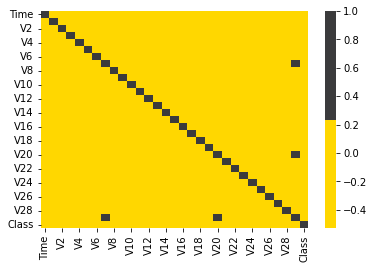

In [8]:
sns.heatmap(data.corr(), cmap = colors, cbar = True)

* There are a lot of features in the dataset. So it is difficult to make a conclusion from this correlation matrix
* Will output another matrix, but using target variable only

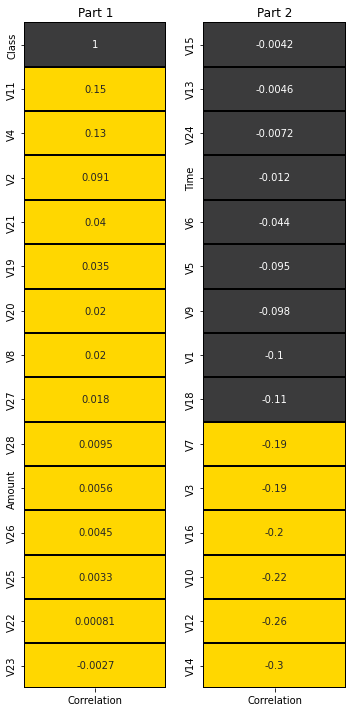

In [9]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)